In [1]:
import numpy as np
import pandas as pd

## Importing dataset

In [2]:
df = pd. read_csv("predictive_maintenance.csv")

## Multiclass classification

We can safely drop the UDI and Product ID as they contain unique identifiers. Let's also drop Type of failure as we will not consider it in this exercise.

In [3]:
df = df.drop("UDI", axis=1, errors="ignore")
df = df.drop("Product ID", axis=1, errors="ignore")
df = df.drop("Type", axis=1, errors="ignore")

We can now do the same exercice, but trying to categorize the actual reason for the failure. For this, we can drop the Target column and instad use the Failure Type as label.

In [4]:
df_multi = df.drop("Target", axis=1, errors="ignore")
df_multi.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,298.1,308.6,1551,42.8,0,No Failure
1,298.2,308.7,1408,46.3,3,No Failure
2,298.1,308.5,1498,49.4,5,No Failure
3,298.2,308.6,1433,39.5,7,No Failure
4,298.2,308.7,1408,40.0,9,No Failure
5,298.1,308.6,1425,41.9,11,No Failure
6,298.1,308.6,1558,42.4,14,No Failure
7,298.1,308.6,1527,40.2,16,No Failure
8,298.3,308.7,1667,28.6,18,No Failure
9,298.5,309.0,1741,28.0,21,No Failure


## EDA

In [5]:
df_multi["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Failure Type', ylabel='count'>

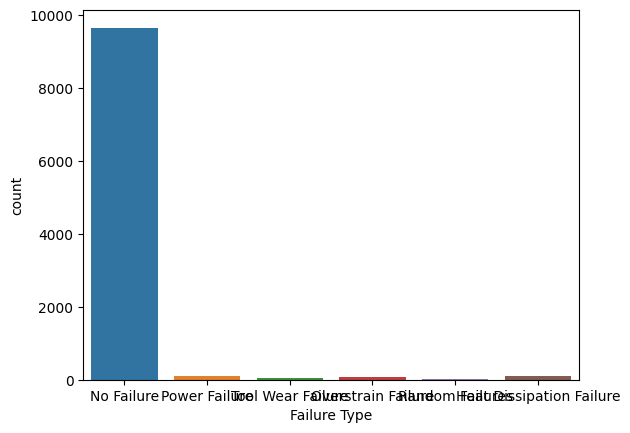

In [7]:
sns.countplot(data=df_multi, x="Failure Type")

We can remove no failure category to see other categories easily.

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '95.0'),
 Text(0, 0, '45.0'),
 Text(0, 0, '78.0'),
 Text(0, 0, '18.0'),
 Text(0, 0, '112.0')]

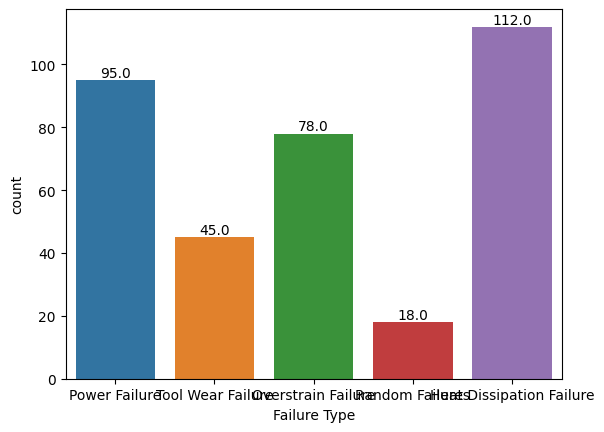

In [8]:
ax = sns.countplot(data=df_multi[df_multi["Failure Type"] != "No Failure"], x="Failure Type")
ax.bar_label(ax.containers[0], fmt='%.1f')

In [9]:
df_multi_grouped = df_multi.groupby("Failure Type").mean()
print(df_multi_grouped.head(10))

                          Air temperature [K]  Process temperature [K]  \
Failure Type                                                             
Heat Dissipation Failure           302.567857               310.799107   
No Failure                         299.972855               309.994343   
Overstrain Failure                 299.867949               310.051282   
Power Failure                      300.075789               309.954737   
Random Failures                    300.766667               310.755556   
Tool Wear Failure                  300.288889               310.164444   

                          Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Failure Type                                                                    
Heat Dissipation Failure             1337.964286    52.778571       107.339286  
No Failure                           1540.324389    39.624316       106.678927  
Overstrain Failure                   1354.243590    56.878205       208.217949  
Po

We can now study how each feature is disturbuted depending oon the failure type.

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

Text(0.5, 1.0, 'Tool wear')

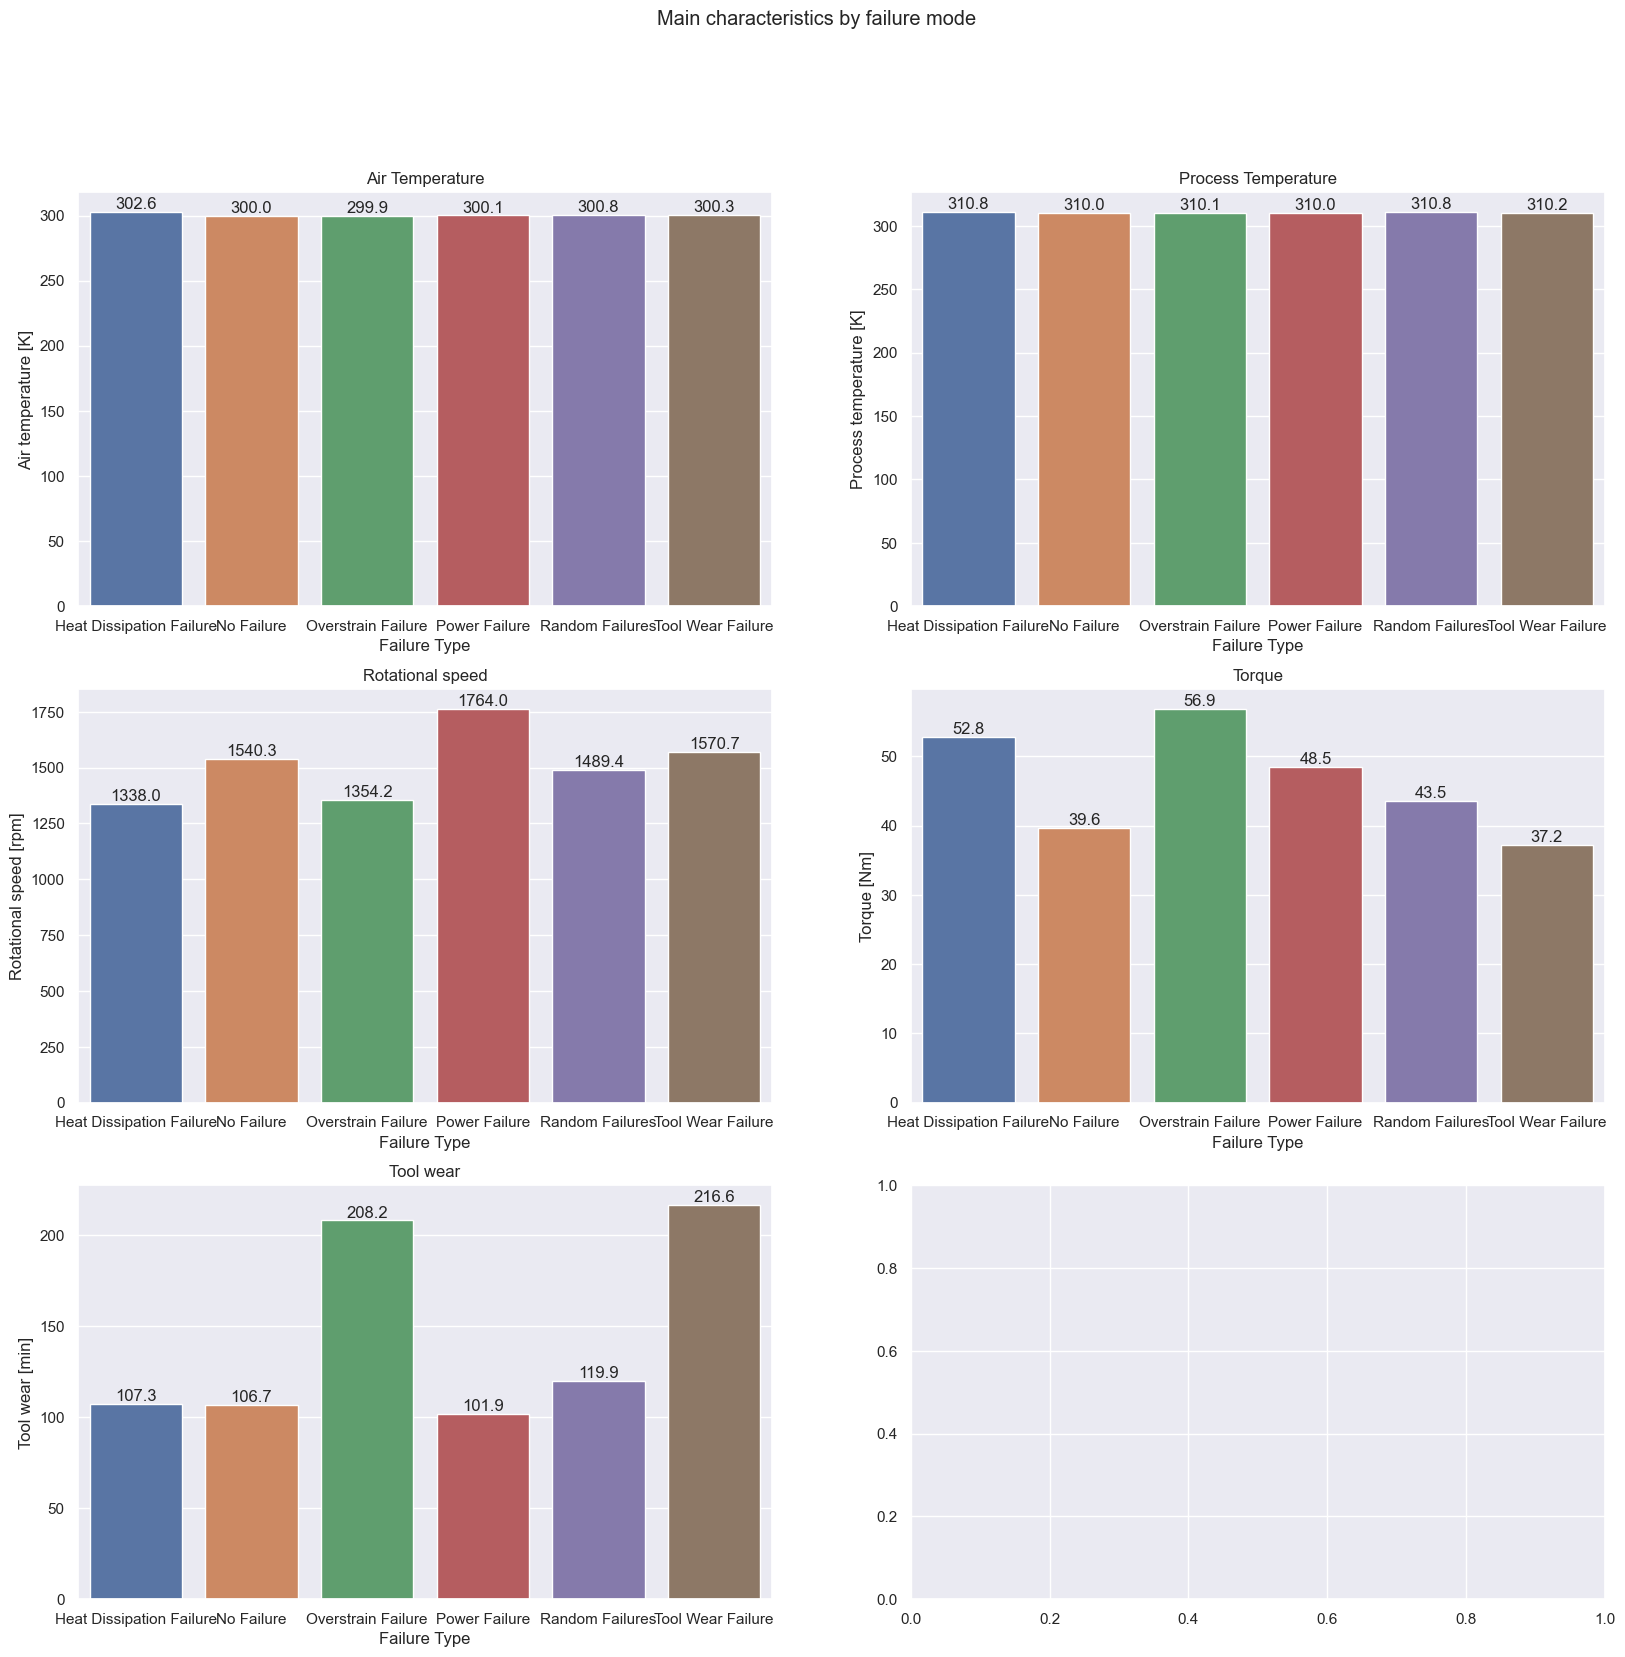

In [10]:
sns.set(rc={'figure.figsize':(19.7,18.27)})
fig, axes = plt.subplots(3, 2)
g1 = sns.barplot(data=df_multi_grouped, y="Air temperature [K]", x=df_multi_grouped.index, ax=axes[0,0])
g1.bar_label(g1.containers[0], fmt='%.1f')
g2 = sns.barplot(data=df_multi_grouped, y="Process temperature [K]", x=df_multi_grouped.index, ax=axes[0,1])
g2.bar_label(g2.containers[0], fmt='%.1f')
g3 = sns.barplot(data=df_multi_grouped, y="Rotational speed [rpm]", x=df_multi_grouped.index, ax=axes[1,0])
g3.bar_label(g3.containers[0], fmt='%.1f')
g4 = sns.barplot(data=df_multi_grouped, y="Torque [Nm]", x=df_multi_grouped.index, ax=axes[1,1])
g4.bar_label(g4.containers[0], fmt='%.1f')
g5 = sns.barplot(data=df_multi_grouped, y="Tool wear [min]", x=df_multi_grouped.index, ax=axes[2,0])
g5.bar_label(g5.containers[0], fmt='%.1f')

fig.suptitle("Main characteristics by failure mode")
g1.set_title("Air Temperature")
g2.set_title("Process Temperature")
g3.set_title("Rotational speed")
g4.set_title("Torque")
g5.set_title("Tool wear")

Boxplots and violin plots display the same information in a different way.

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

Text(0.5, 1.0, 'Tool wear')

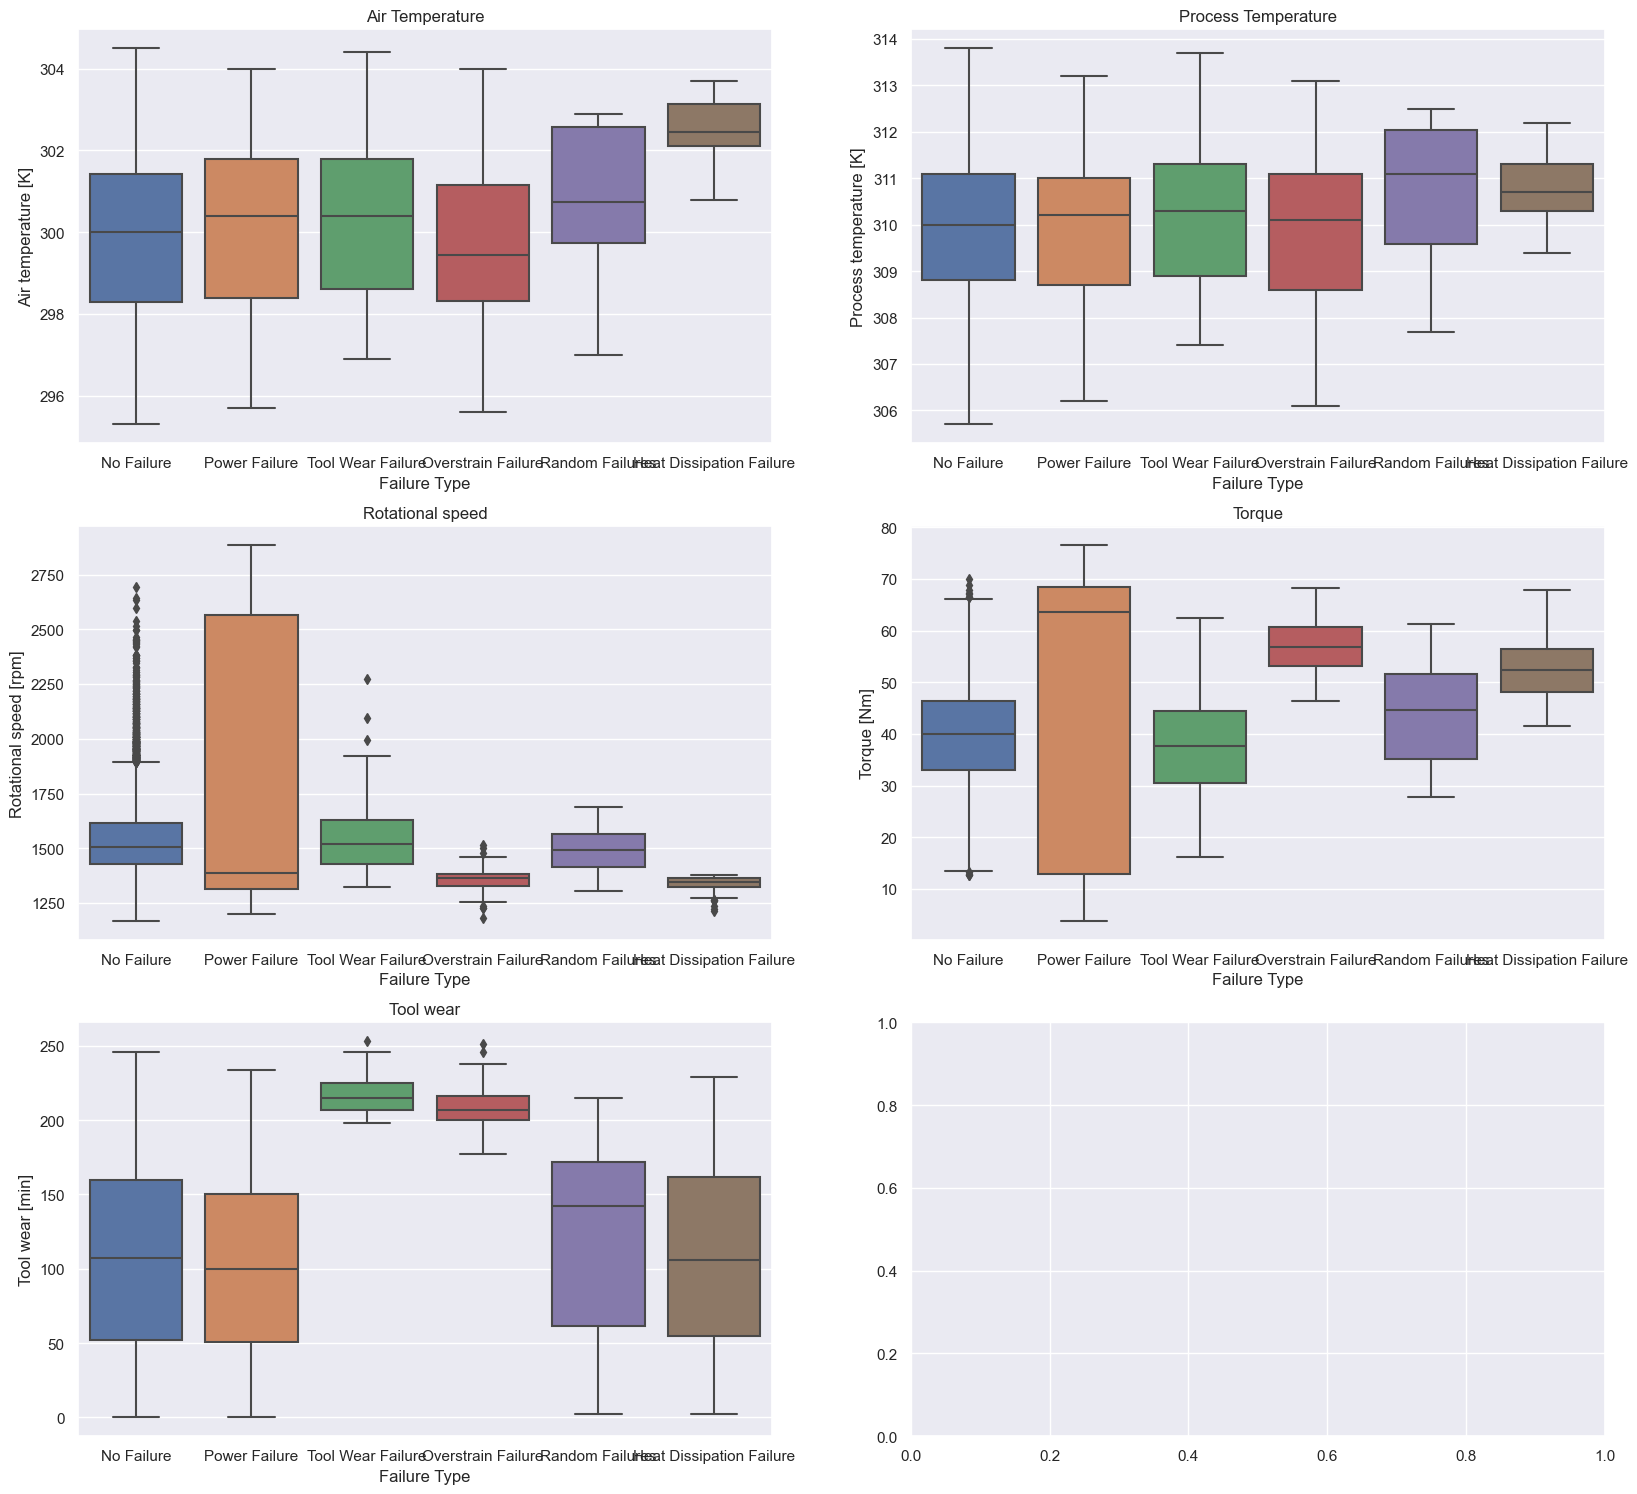

In [11]:
fig, axes = plt.subplots(3, 2)
g1 = sns.boxplot(data=df_multi, y="Air temperature [K]", x="Failure Type", ax=axes[0,0])
g2 = sns.boxplot(data=df_multi, y="Process temperature [K]", x="Failure Type", ax=axes[0,1])
g3 = sns.boxplot(data=df_multi, y="Rotational speed [rpm]", x="Failure Type", ax=axes[1,0])
g4 = sns.boxplot(data=df_multi, y="Torque [Nm]", x="Failure Type", ax=axes[1,1])
g5 = sns.boxplot(data=df_multi, y="Tool wear [min]", x="Failure Type", ax=axes[2,0])

g1.set_title("Air Temperature")
g2.set_title("Process Temperature")
g3.set_title("Rotational speed")
g4.set_title("Torque")
g5.set_title("Tool wear")

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

Text(0.5, 1.0, 'Tool wear')

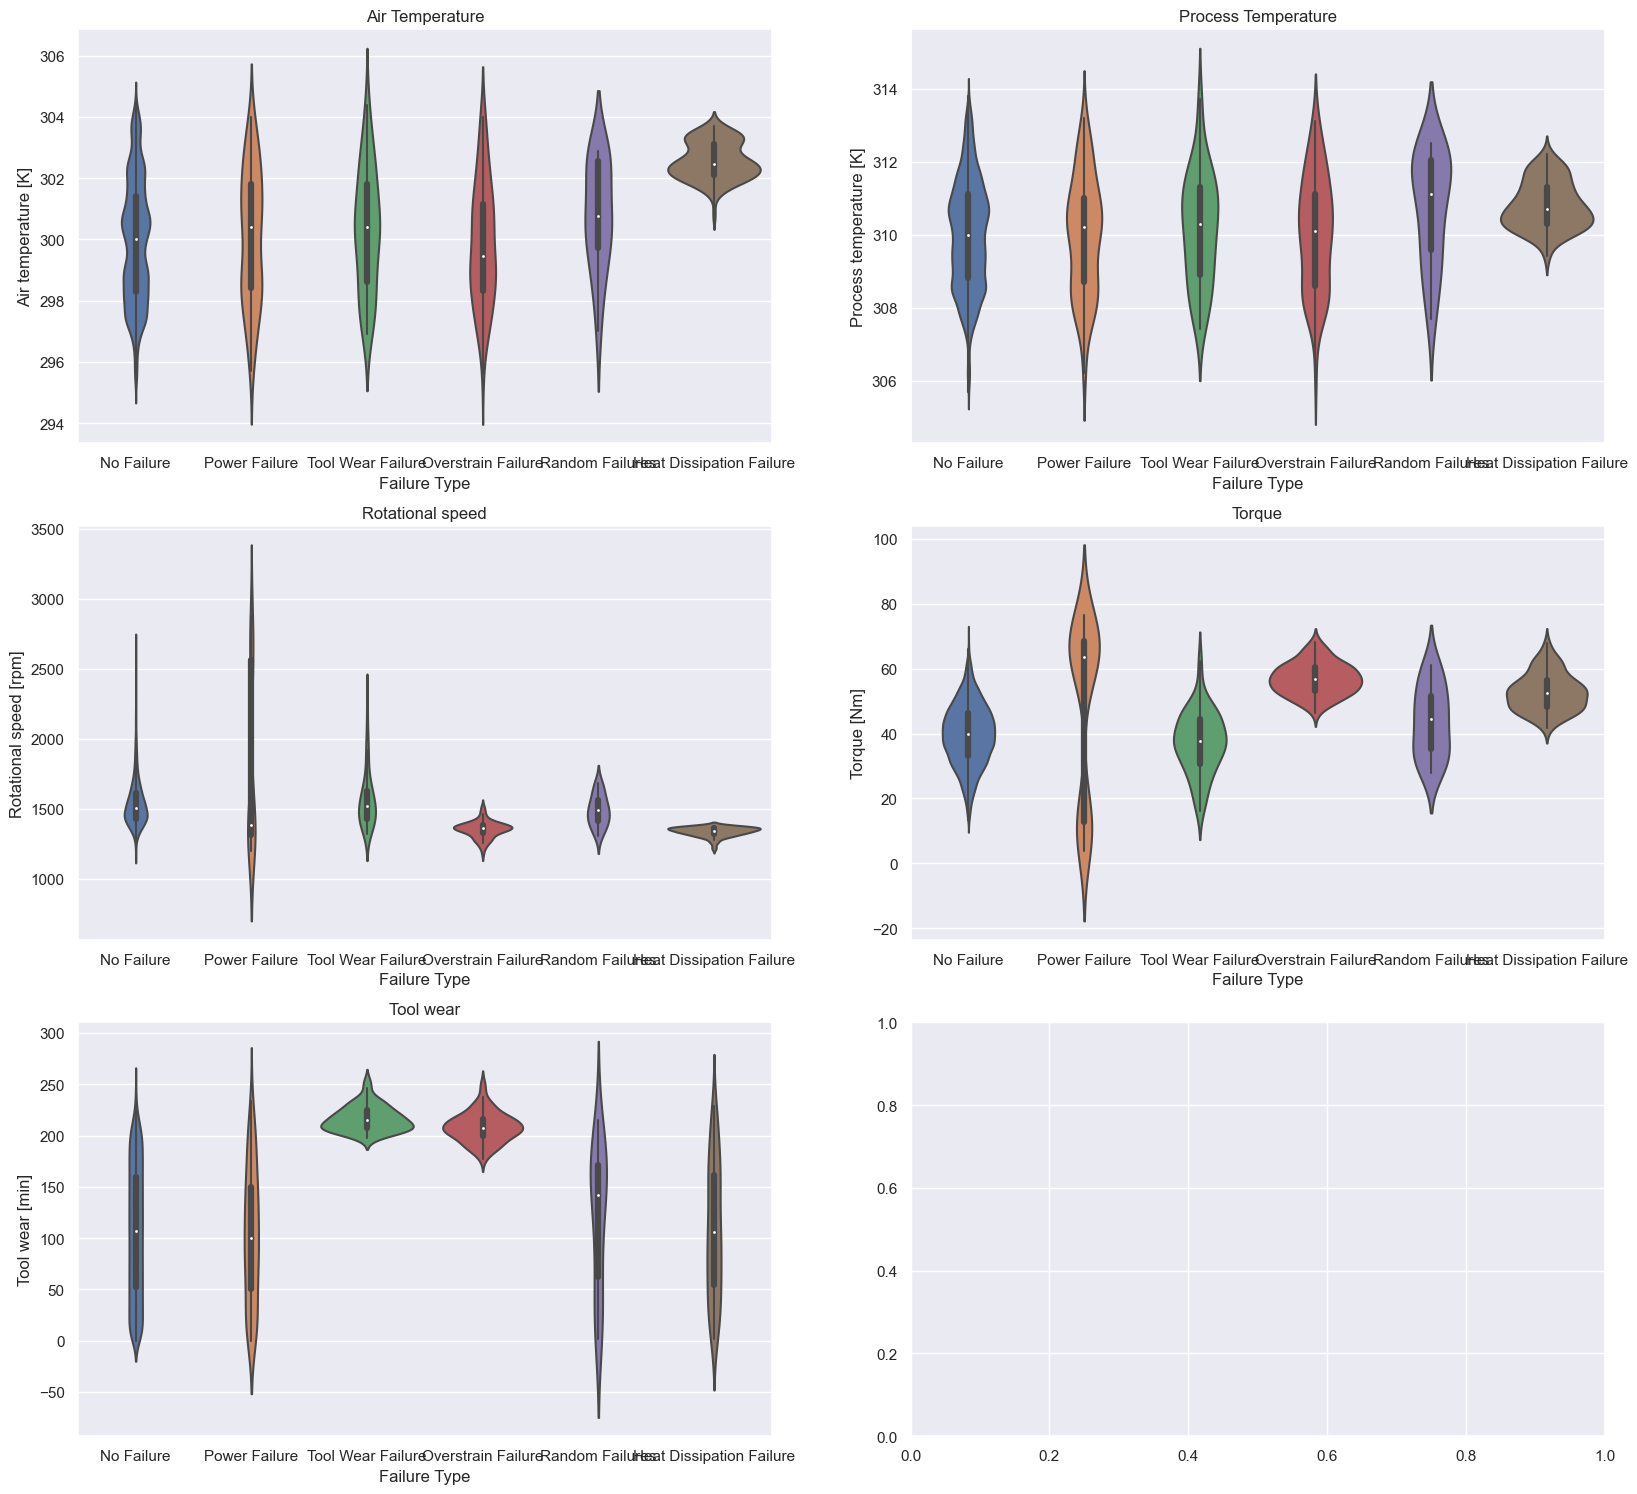

In [12]:
fig, axes = plt.subplots(3, 2)
g1 = sns.violinplot(data=df_multi, y="Air temperature [K]", x="Failure Type", ax=axes[0,0])
g2 = sns.violinplot(data=df_multi, y="Process temperature [K]", x="Failure Type", ax=axes[0,1])
g3 = sns.violinplot(data=df_multi, y="Rotational speed [rpm]", x="Failure Type", ax=axes[1,0])
g4 = sns.violinplot(data=df_multi, y="Torque [Nm]", x="Failure Type", ax=axes[1,1])
g5 = sns.violinplot(data=df_multi, y="Tool wear [min]", x="Failure Type", ax=axes[2,0])

g1.set_title("Air Temperature")
g2.set_title("Process Temperature")
g3.set_title("Rotational speed")
g4.set_title("Torque")
g5.set_title("Tool wear")

We can also study the distributions of eah feature, using the same and then a separate normalization.

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<Axes: xlabel='Tool wear [min]', ylabel='Count'>

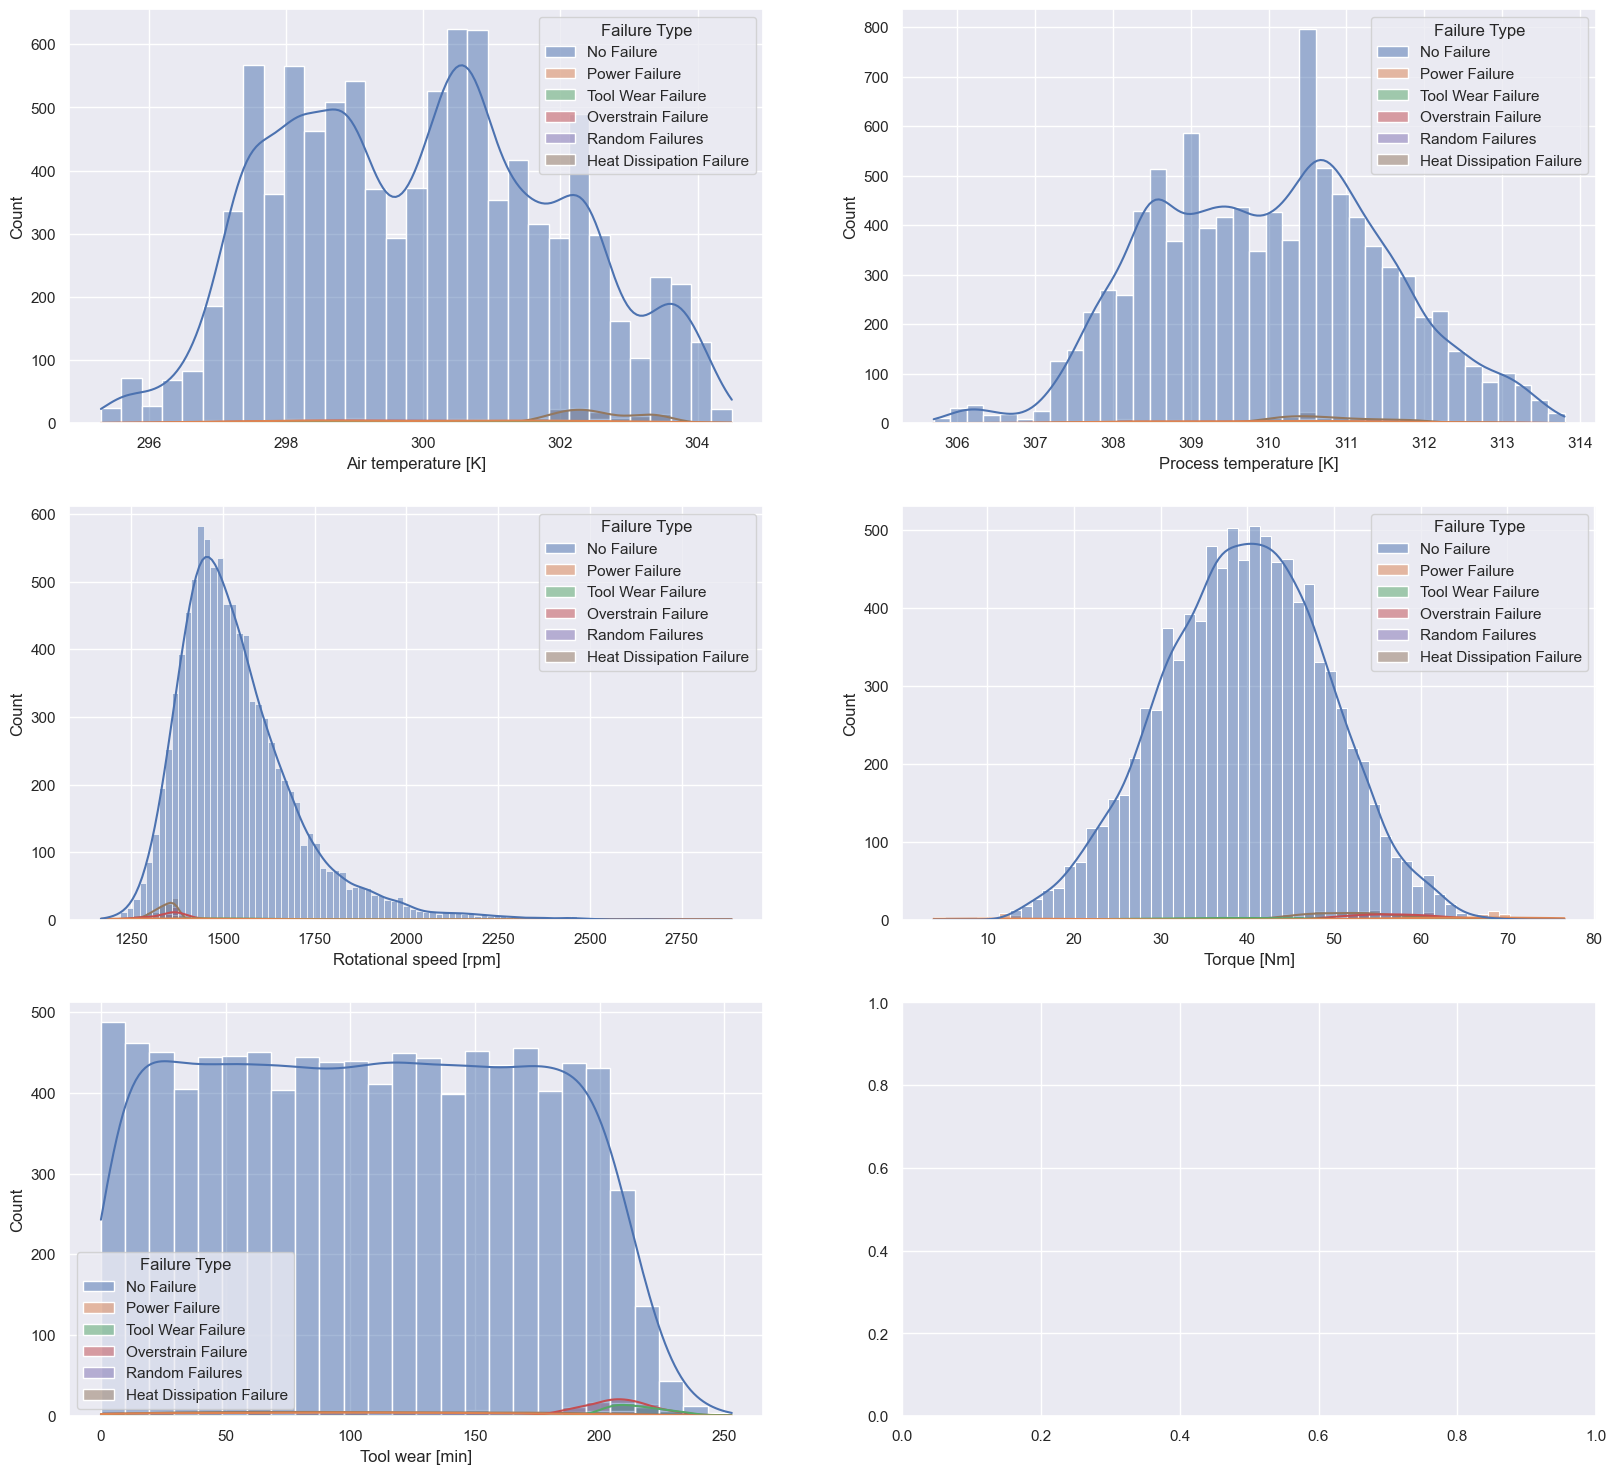

In [13]:
fig, axes = plt.subplots(3, 2)
sns.histplot(data=df_multi, x="Air temperature [K]", hue="Failure Type", kde=True, ax=axes[0,0])
sns.histplot(data=df_multi, x="Process temperature [K]", hue="Failure Type", kde=True, ax=axes[0,1])
sns.histplot(data=df_multi, x="Rotational speed [rpm]", hue="Failure Type", kde=True, ax=axes[1,0])
sns.histplot(data=df_multi, x="Torque [Nm]", hue="Failure Type", kde=True, ax=axes[1,1])
sns.histplot(data=df_multi, x="Tool wear [min]", hue="Failure Type", kde=True, ax=axes[2,0])

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

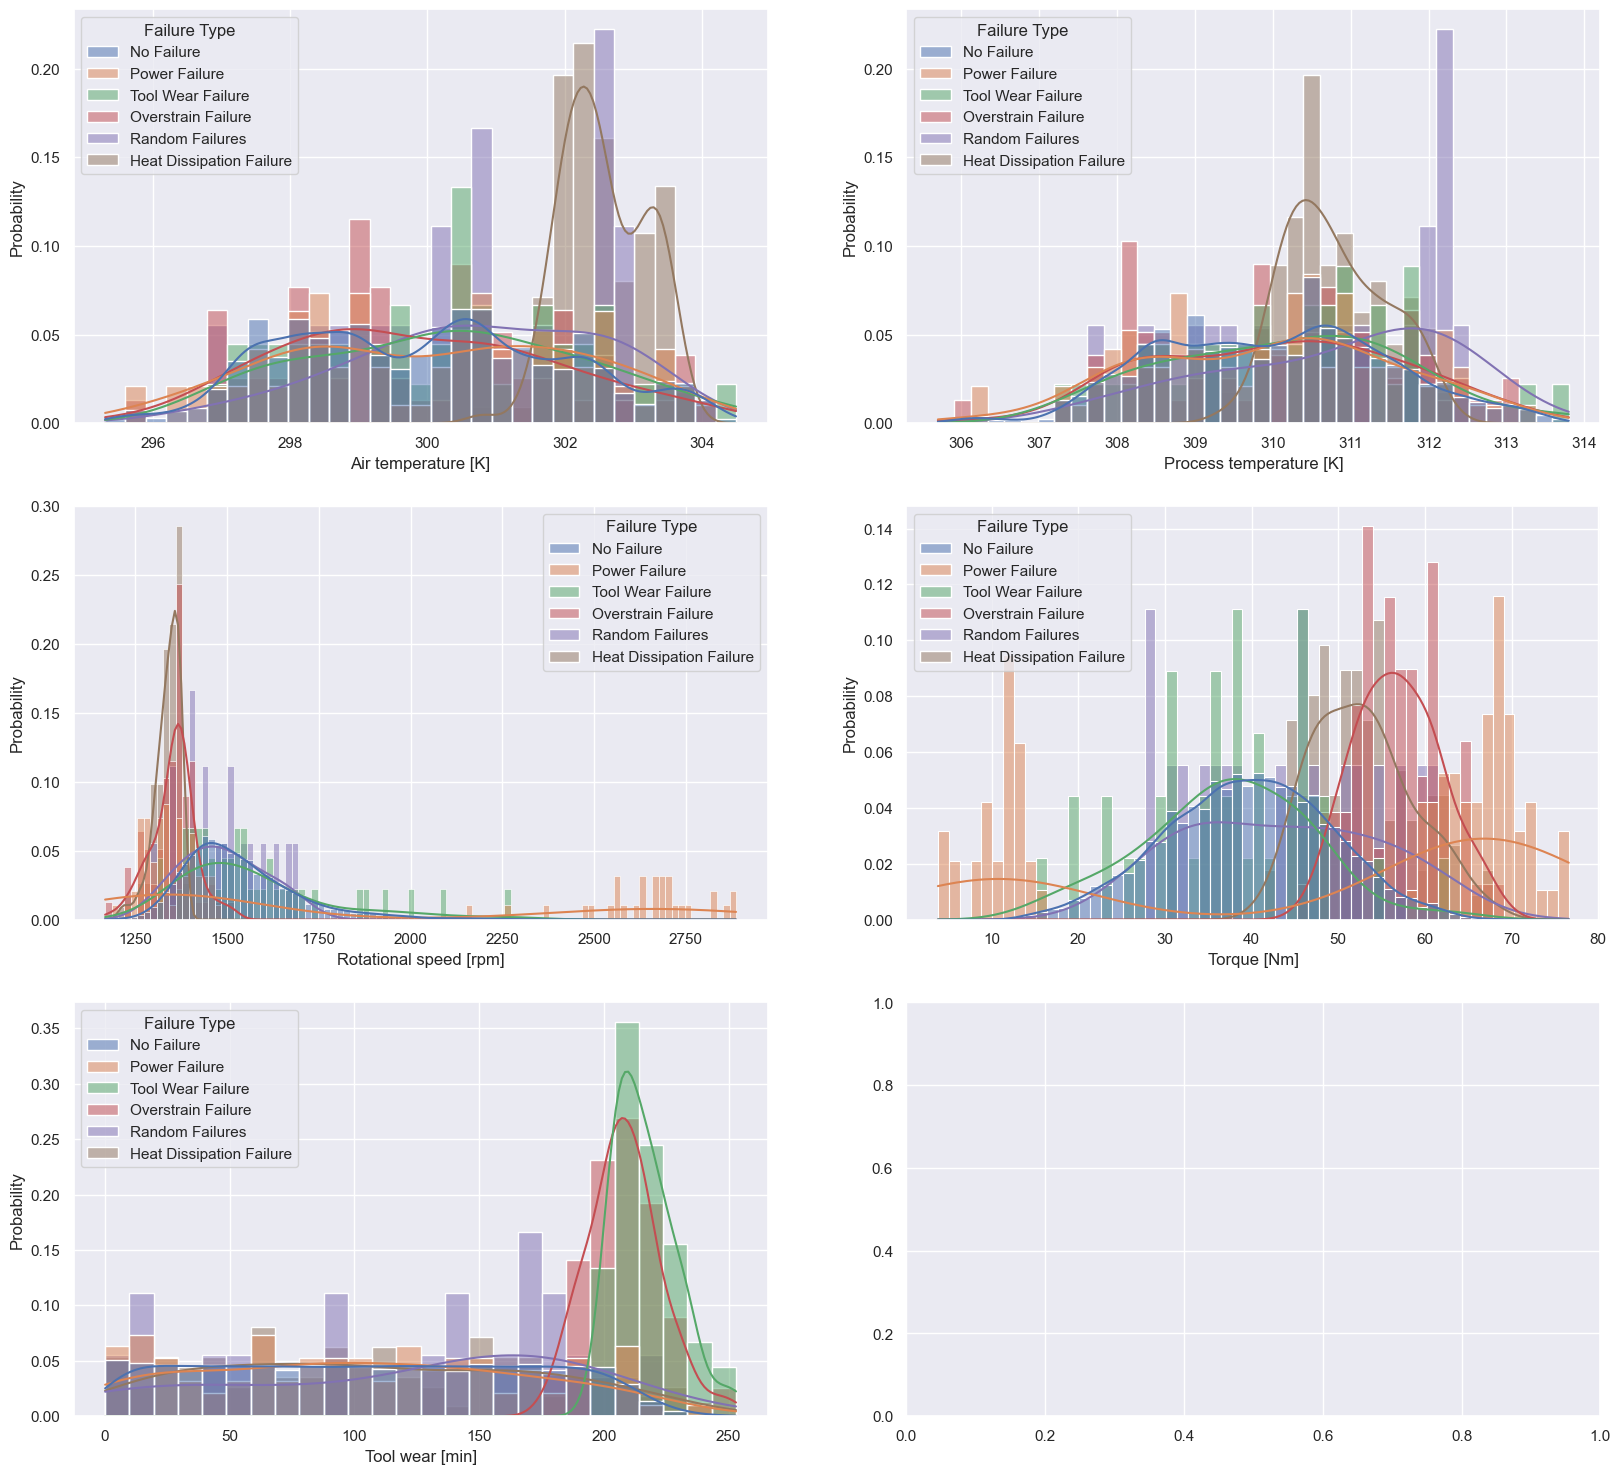

In [14]:
fig, axes = plt.subplots(3, 2)
sns.histplot(data=df_multi, x="Air temperature [K]", hue="Failure Type", kde=True, ax=axes[0,0], stat="probability", common_norm=False)
sns.histplot(data=df_multi, x="Process temperature [K]", hue="Failure Type", kde=True, ax=axes[0,1], stat="probability", common_norm=False)
sns.histplot(data=df_multi, x="Rotational speed [rpm]", hue="Failure Type", kde=True, ax=axes[1,0], stat="probability", common_norm=False)
sns.histplot(data=df_multi, x="Torque [Nm]", hue="Failure Type", kde=True, ax=axes[1,1], stat="probability", common_norm=False)
sns.histplot(data=df_multi, x="Tool wear [min]", hue="Failure Type", kde=True, ax=axes[2,0], stat="probability", common_norm=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

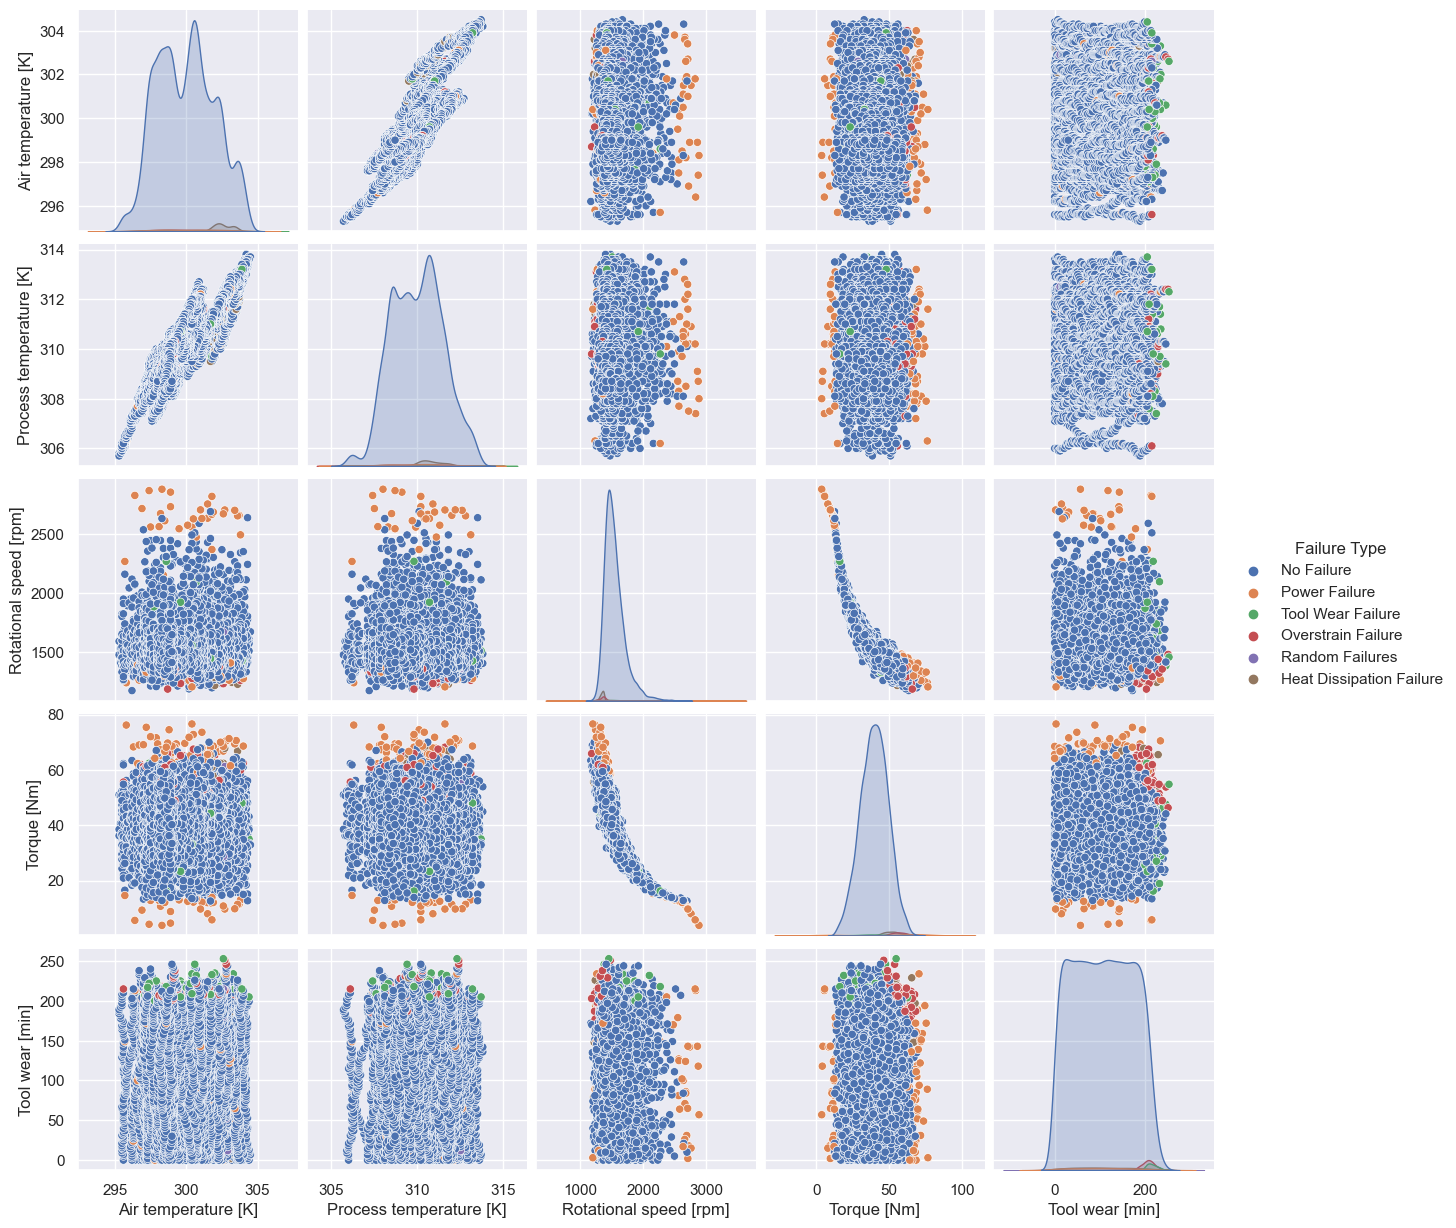

In [15]:
sns.pairplot(data=df_multi, hue="Failure Type", plot_kws=dict(alpha=1.0))

Removing the no failure category allows us to see what is going on for each failure type.

/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lakshmimounikab/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

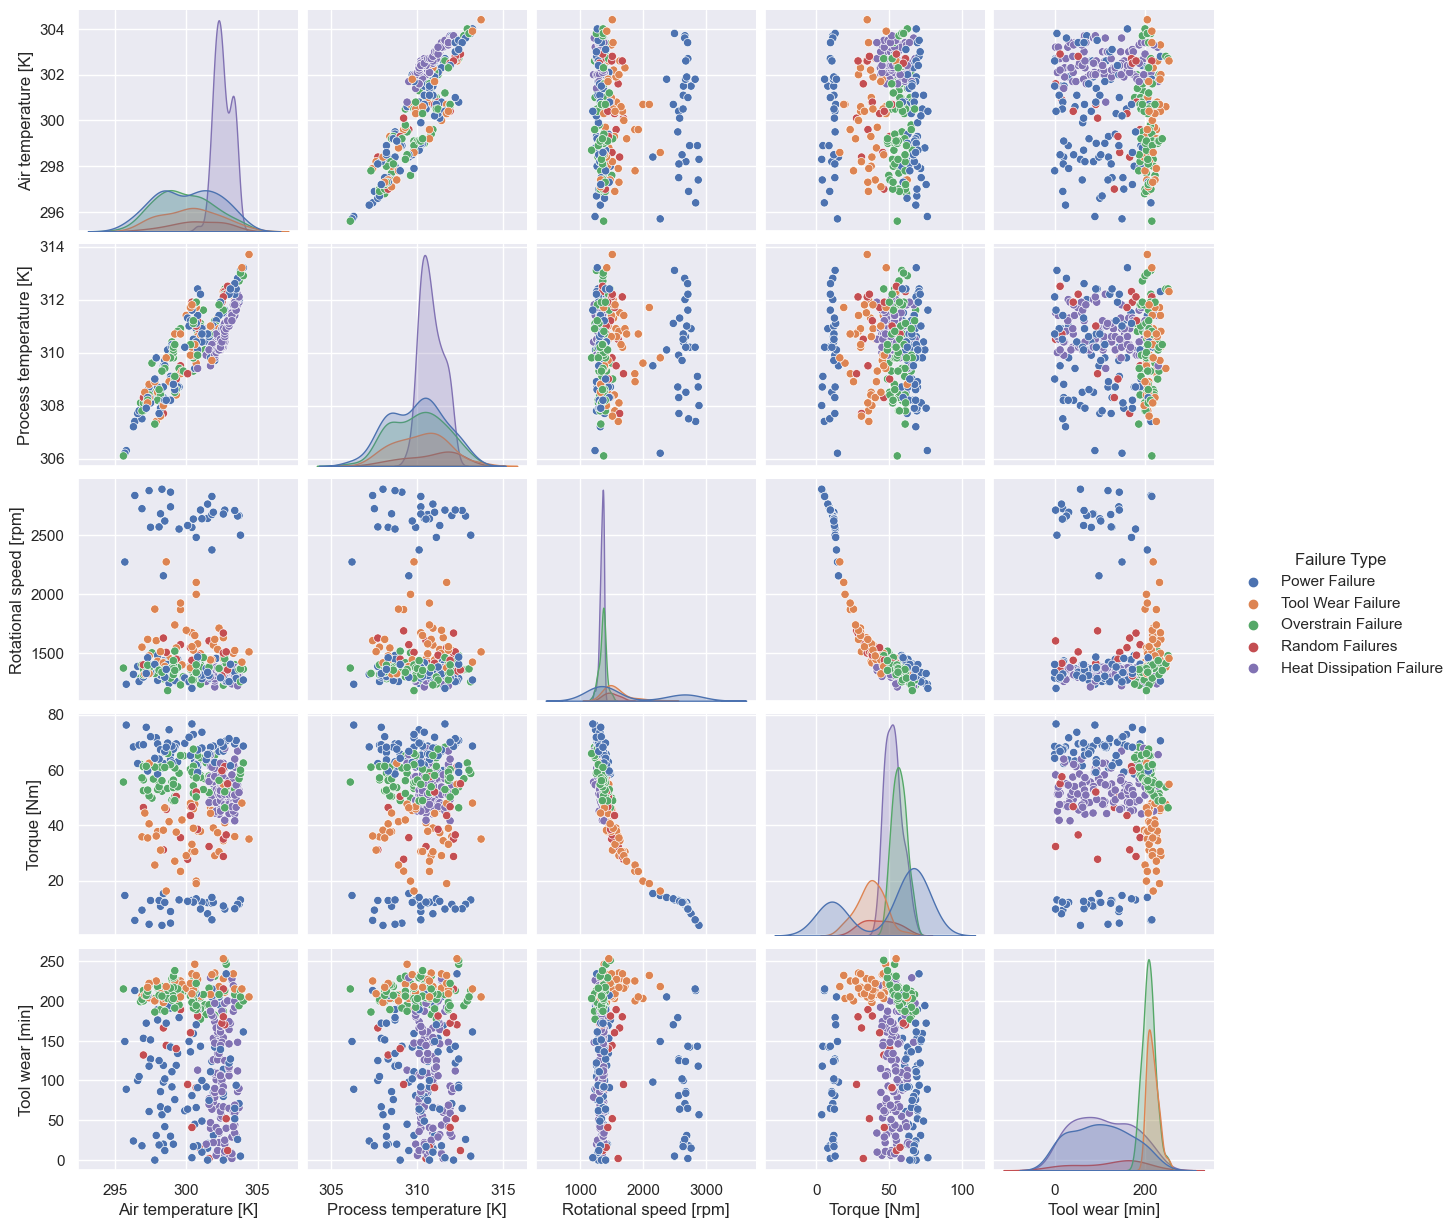

In [16]:
sns.pairplot(data=df_multi[df_multi["Failure Type"] != "No Failure"], hue="Failure Type", plot_kws=dict(alpha=1.0))

## Train test split

In [17]:
from sklearn.model_selection import train_test_split

X_multi = df_multi.drop("Failure Type", axis=1)
y_multi = df_multi["Failure Type"]

X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
X_multi_train.shape, X_multi_test.shape, y_multi_train.shape, y_multi_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

## Data cleaning

Let's use the OneHotEncoder to encode the labels before training the models.

In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_multi_train = ohe.fit_transform(y_multi_train.values.reshape(-1, 1))
y_multi_test = ohe.transform(y_multi_test.values.reshape(-1, 1))

In [19]:
y_multi_train = pd.DataFrame(y_multi_train.toarray(), columns=ohe.categories_)
y_multi_test = pd.DataFrame(y_multi_test.toarray(), columns=ohe.categories_)
y_multi_train.head(10)

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
y_multi_train.describe()

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.012125,0.964625,0.008125,0.009375,0.001500,0.004250
std,0.109451,0.184737,0.089777,0.096376,0.038703,0.065057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
y_multi_train[y_multi_train > 0.0].count()

Heat Dissipation Failure      97
No Failure                  7717
Overstrain Failure            65
Power Failure                 75
Random Failures               12
Tool Wear Failure             34
dtype: int64

## Scaling

In [22]:
X_multi_train.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,300.009925,310.006088,1538.776625,40.007800,108.068750
std,2.002224,1.486484,180.594083,9.979156,63.225052
min,295.300000,305.700000,1181.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1502.000000,40.200000,108.000000
75%,301.500000,311.100000,1611.250000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.200000,253.000000


In [23]:
from sklearn.preprocessing import StandardScaler

to_scale = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

sc = StandardScaler()
X_multi_train[to_scale] = sc.fit_transform(X_multi_train[to_scale])
X_multi_test[to_scale] = sc.transform(X_multi_test[to_scale])
X_multi_train.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,-3.342171e-14,-2.343170e-14,1.811884e-16,-3.126388e-16,9.414691e-17
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-2.352493e+00,-2.897008e+00,-1.981233e+00,-3.628570e+00,-1.709378e+00
25%,-8.540660e-01,-8.114199e-01,-6.411277e-01,-6.822446e-01,-8.710502e-01
50%,4.499028e-02,6.318154e-02,-2.036552e-01,1.926135e-02,-1.087453e-03
75%,7.442563e-01,7.359519e-01,4.013305e-01,6.806813e-01,8.530578e-01
max,2.242683e+00,2.552432e+00,7.460419e+00,3.627006e+00,2.292451e+00


## Model training

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="micro")
    recall = recall_score(y_test, y_pred, average="micro")
    f1 = f1_score(y_test, y_pred, average="micro")
    
    return accuracy, precision, recall, f1

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

result = {}
for model,name in zip([dtc, rfc],
                     ["Decision Tree", "Random Forest"]):
    result[name] = fit_model(model, X_multi_train, X_multi_test, y_multi_train, y_multi_test)

In [26]:
df_result = pd.DataFrame(np.array(list(result.values())),
                       columns= ["ACCURACY", "PRECISION", "RECALL", "F1-SCORE"], 
                       index= result.keys())

df_result.index.name = "Model"   # name the index of the result1 dataframe as 'Model'
df_result

,ACCURACY,PRECISION,RECALL,F1-SCORE
Model,,,,
Decision Tree,0.9715,0.971500,0.9715,0.971500
Random Forest,0.9805,0.983944,0.9805,0.982219


The best model out of the box seems to be in this case the Random Forest classifier.

## Hyperparameters tuning

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a Random Forest classifier
rfc = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to the data
grid_search.fit(X_multi_train, y_multi_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 97.88%
